In [26]:
import numpy as np
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import csv

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Conv2DTranspose, MaxPool2D#, Flatten, Dense, concatenate, add, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

from tensorflow.keras.preprocessing import image as image_utils

In [3]:
# !cp -rf /content/drive/MyDrive/Skin_Cancer_Detection_Denoising_AutoEncoder_SOP/hairless_image .
# !cp -rf /content/drive/MyDrive/Skin_Cancer_Detection_Denoising_AutoEncoder_SOP/hairy_image .

# !unzip /content/drive/MyDrive/Skin_Cancer_Detection_Denoising_AutoEncoder_SOP/ISIC_2020_Training_JPEG.zip -d .

In [4]:
import os
x_list = np.array(os.listdir('/content/hairy_image'))
y_list = np.array([fname.split('-')[0]+'.jpg' for fname in x_list])

# print(len(x_list))
# print(len(y_list))

# all_hairless = os.listdir(/content/hairless_image)

In [5]:
def load_and_process_image(image_path, tgt_sz):
    image = image_utils.load_img(image_path, target_size=tgt_sz)
    image = image_utils.img_to_array(image)
    return image

In [6]:
target_size = (512, 512, 3)

x_train = np.array([load_and_process_image('/content/hairy_image/' + fname, target_size) for fname in x_list])/255.
y_train = np.array([load_and_process_image('/content/hairless_image/' + fname, target_size) for fname in y_list])/255.

from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
x_test = np.array([load_and_process_image('/content/train/' + fname, target_size) for fname in os.listdir('/content/train')[:100]])/255.

In [7]:
# test_imgs = list(os.listdir('/content/train').sort())
# print(type(test_imgs))
# x_test = np.array([load_and_process_image('/content/train/' + fname, target_size) for fname in test_imgs])/255.

In [8]:
def plot_data(data):
    fig, axes = plt.subplots(1, 10, figsize=(20, 8),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(512, 512, 3),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 1))

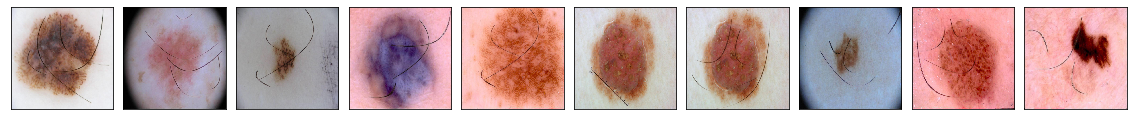

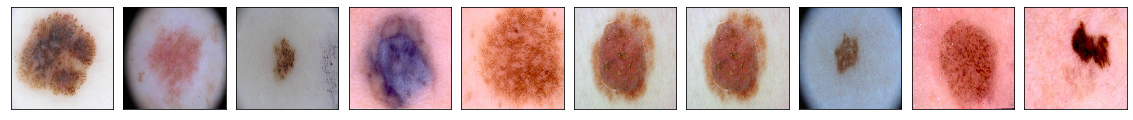

In [9]:
# plot_data(x_train[:10])
# plot_data(y_train[:10])

In [48]:
inp = Input(x_train[0].shape)

x1 = Conv2D(64, (3,3), padding='same', activation='relu', kernel_initializer='he_normal')(inp)
x2 = Conv2D(128, (3,3), padding='same', activation='relu', strides = (2,2))(x1)
x3 = Conv2D(256, (3,3), padding='same', activation='relu')(x2)
x4 = Conv2D(512, (3,3), padding='same', activation='relu', strides = (2,2))(x3)
x5 = Conv2D(512, (3,3), padding='same', activation='relu')(x4)
x6 = Conv2DTranspose(256, (3,3), padding='same', activation='relu', strides = (2,2))(x5) + x3
x7 = Conv2D(128, (3,3), padding='same', activation='relu')(x6) + x2
x8 = Conv2DTranspose(64, (3,3), padding='same', activation='relu', strides = (2,2))(x7) + x1
x9 = Conv2D(128, (3,3), padding='same', activation='relu')(x8)
out = Conv2D(3, (3,3), padding='same', activation='relu')(x9)

model = Model(inputs = inp, outputs = out)
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001), loss = 'MSE')
model.summary()

# Custom Loss function, Batch normalisation, Callbacks (early stopping, reduce lr on plateau), MaxPool2D

Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_26 (InputLayer)          [(None, 512, 512, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_157 (Conv2D)            (None, 512, 512, 64  1792        ['input_26[0][0]']               
                                )                                                                 
                                                                                                  
 conv2d_158 (Conv2D)            (None, 256, 256, 12  73856       ['conv2d_157[0][0]']             
                                8)                                                          

In [49]:
history = model.fit(x_train[:-1], y_train[:-1], epochs=30, batch_size=8)

Epoch 1/30
12/12 [==============================] - 45s 4s/step - loss: 0.2815
Epoch 2/30
12/12 [==============================] - 44s 4s/step - loss: 0.1841
Epoch 3/30
12/12 [==============================] - 44s 4s/step - loss: 0.1373
Epoch 4/30
12/12 [==============================] - 44s 4s/step - loss: 0.1304
Epoch 5/30
12/12 [==============================] - 44s 4s/step - loss: 0.0891
Epoch 6/30
12/12 [==============================] - 44s 4s/step - loss: 0.0242
Epoch 7/30
12/12 [==============================] - 44s 4s/step - loss: 0.0081
Epoch 8/30
12/12 [==============================] - 44s 4s/step - loss: 0.0049
Epoch 9/30
12/12 [==============================] - 44s 4s/step - loss: 0.0038
Epoch 10/30
12/12 [==============================] - 44s 4s/step - loss: 0.0034
Epoch 11/30
12/12 [==============================] - 44s 4s/step - loss: 0.0031
Epoch 12/30
12/12 [==============================] - 44s 4s/step - loss: 0.0029
Epoch 13/30
12/12 [==============================

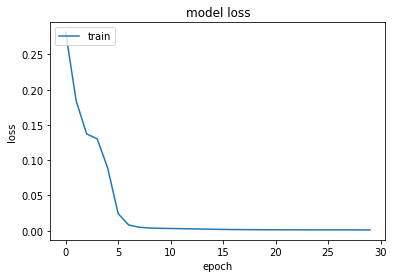

In [50]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

In [51]:
len(x_test)

100

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

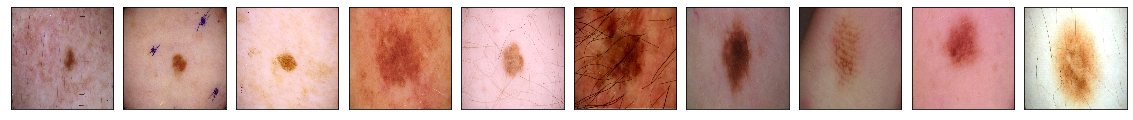

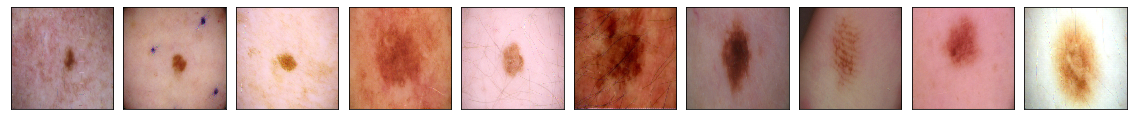

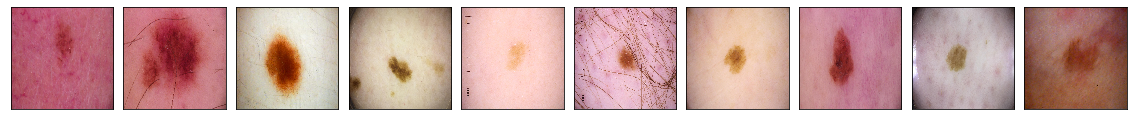

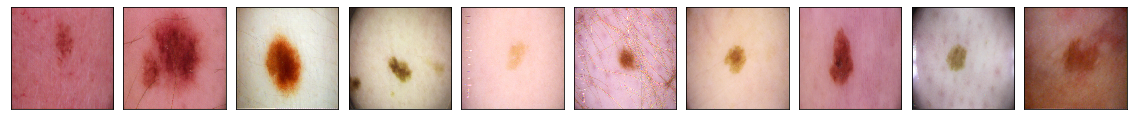

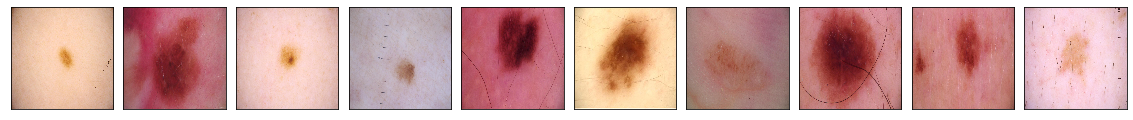

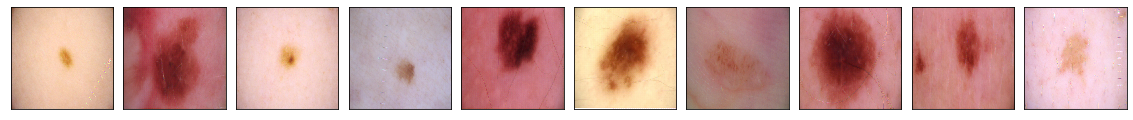

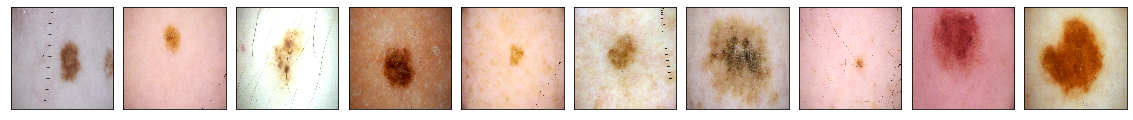

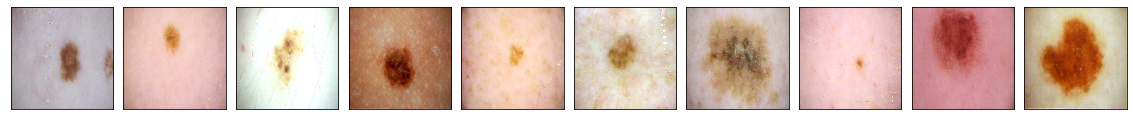

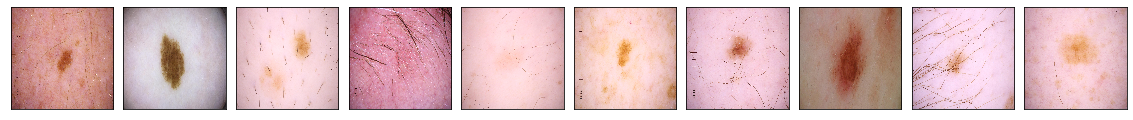

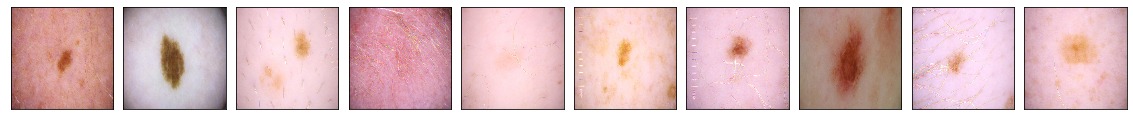

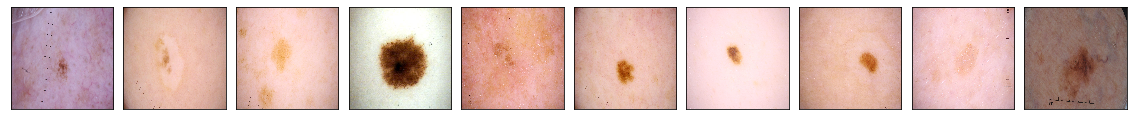

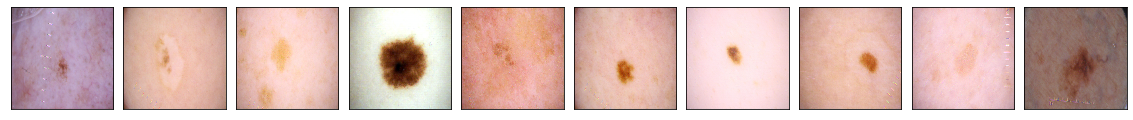

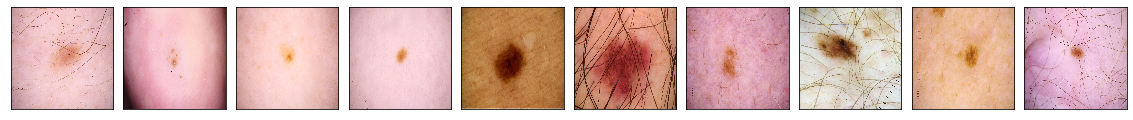

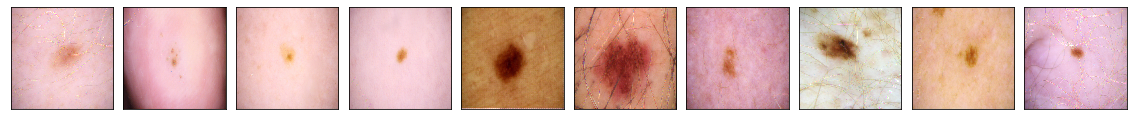

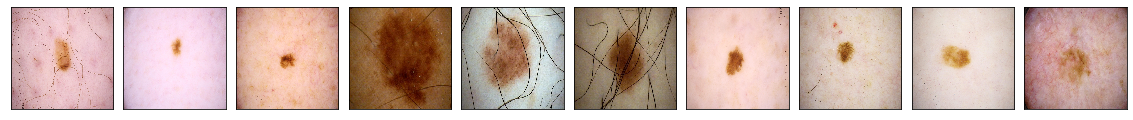

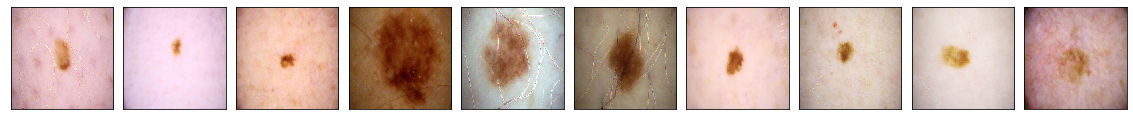

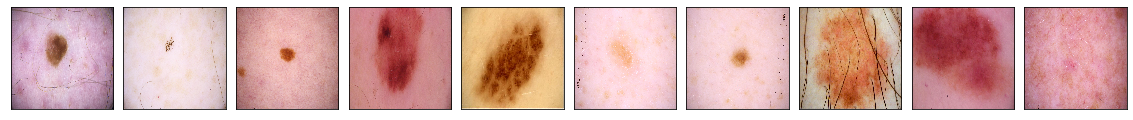

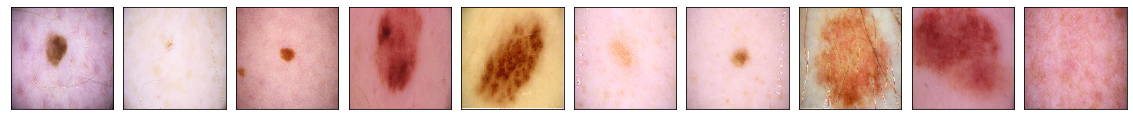

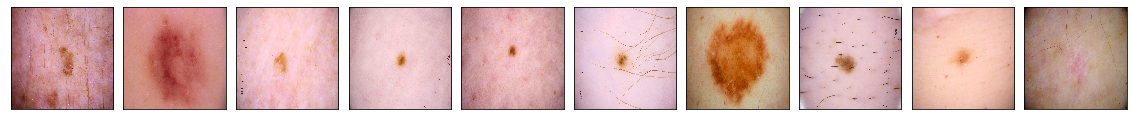

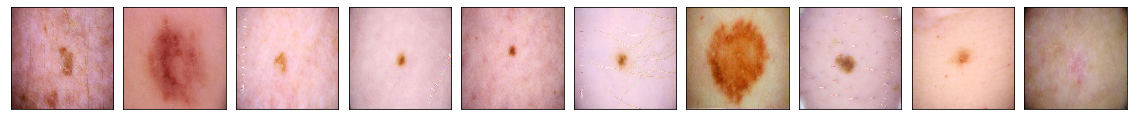

In [52]:
y_test = []

for i in range(10):
    y_test.append(model.predict(x_test[10*i:10*i+10]))
    plot_data(x_test[10*i:10*i+10])
    plot_data(y_test[i])